In [31]:
from collections import namedtuple
from os import path
from PIL import Image, ImageDraw
from circles.adjustcolors import darken_color, lighten_color
from circles.conversions import to_hexcolor, to_rgba

# stuff that will be in a global config

width = 300
height = 100
filename = "current_program.png" 

BLACK = '#000000'
WHITE = '#ffffff'


In [32]:
class DarkenCommand():
    def __init__(self, steps):
        self.steps = steps

class LightenCommand():
    def __init__(self, steps):
        self.steps = steps
        
class ColorCommand():
    def __init__(self, color):
        self.color = color

class DeleteCommand():
    def __init__(self, color):
        self.color = color

class RepeatCommand():
    def __init__(self, color):
        self.color = color


In [39]:

def get_first_white_height(image):
    current = 0
    while current < image.size[1]:
        pixel = image.getpixel((0, current))
        if to_hexcolor(pixel) == WHITE:
            return current
        current += 1
    return current

def extend_program(command):
    if not path.exists(filename):
        image = create_and_save_new_image()
    image = Image.open(filename)
    draw = ImageDraw.Draw(image)

    # find first point that is white 
    target = get_first_white_height(image)
    
    # todo what if its the first color being added
    previous_color = image.getpixel((0, target-1)) if (target > 0) else None
    new_color = get_new_color(previous_color, command)

    draw.line((0, target, width, target), fill = new_color)
    image.save(filename, "PNG")
    
    
def get_new_color(previous_color, command):
    if isinstance(command, DarkenCommand) and previous_color:
        return darken_color(previous_color, command.steps)
    elif isinstance(command, LightenCommand) and previous_color:
        return lighten_color(previous_color, command.steps)
    elif isinstance(command, ColorCommand):
        return command.color
    print('command not recognised')
    return None

def create_and_save_new_image():
    image = Image.new('RGBA', (width, height), color=WHITE)
    draw = ImageDraw.Draw(image)
    image.save(filename, "PNG")
    return image

def get_image():
    if path.exists(filename):
        image = Image.open(filename)
        return image


In [40]:

color = '#bfe2ca'
for i in range(5):
    extend_program(ColorCommand(color))
for i in range(1):
    extend_program(ColorCommand(darken_color(color, 1)))
for i in range(1):
    extend_program(ColorCommand(darken_color(color, 7)))                            

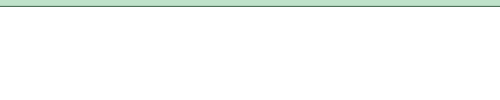

In [41]:
get_image()